In [1]:
from fenics import *

In [2]:
import numpy as np

In [3]:
mesh = UnitIntervalMesh(50)

In [4]:
V = FunctionSpace(mesh, "Lagrange", 1)

In [5]:
u = Function(V)
v = TestFunction(V)
lambd = Constant(1.0)

In [6]:
bc = DirichletBC(V,0.0,"on_boundary")

In [7]:
F = inner(grad(u),grad(v))*dx - lambd**2*sin(u)*v*dx

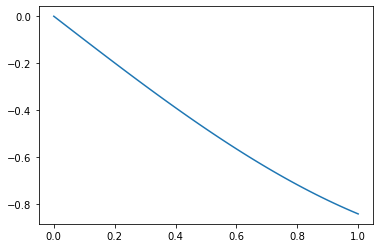

In [8]:
u.interpolate(Expression("-sin(x[0])", degree = 2))
u_mid = np.zeros(15)
plot(u)

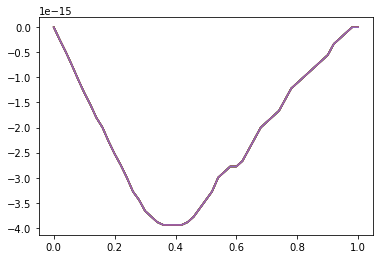

In [9]:
for ij, lambd_val in enumerate(list(np.linspace(0, 2*pi, 15))):
    lambd.assign(lambd_val)
    lambd = Constant(lambd_val)
    F = inner(grad(u),grad(v))*dx - lambd**2*sin(u)*v*dx
    solve(F==0, u, bc, solver_parameters={"newton_solver": {"maximum_iterations": 100}})
    u_mid[ij]=u(0.5)
    plot(u)

In [ ]:
lambd

In [ ]:
u_mid

In [ ]:
u(0.5)

In [ ]:
plot(u)